&copy; Mirko Piani - *PhD student in Precision Orchard Management (POM), university of Bologna (IT)*
___

If you are having problems with the notebook, contact me at mirko.piani2@unibo.it

![numpy-logo](https://numpy.org/devdocs/_static/numpylogo.svg) 

[Numpy: from Begginners to Advanced tutorials](https://numpy.org/learn/)

Learning [NumPy](https://numpy.org/devdocs/user/whatisnumpy.html) in Python is highly beneficial, especially if you are working in fields such as data science, machine learning, scientific computing, or any domain that requires numerical computations. At the core of the *Numpy* package is the `ndarray` object. This encapsulates *n*-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance.

There are several important differences between NumPy arrays and the standard Python sequences:

- NumPy arrays have a **fixed size at creation**, unlike Python lists (which can grow dynamically). Changing the size of an `ndarray` will create a new array and **delete the original**.

- The elements in a *NumPy* array are all required to be of the **same data type**, and thus will be the same size in memory. 

- **NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data**. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.

The points about sequence size and speed are particularly important in scientific computing.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Speed test

> **Example**: consider the case of multiplying each element in a 1-D sequence (= vector) with the corresponding element in another sequence of the same length. 

If the data are stored in two Python **lists**, `a` and `b`, we could iterate over each element:

In [32]:
a = [10, 20, 30, 40, 50 , 60]  # list
b = [2, 1, 3, 4, 4 , 3]  # list

start = time.time()
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])

end = time.time()
elapsed_time_list = end - start

print(c)
print(f'{elapsed_time_list= : .4f} s')

[20, 20, 90, 160, 200, 180]
elapsed_time_list=  0.0074 s


This produces the correct answer, but if `a` and `b` each contain **millions of numbers**, we will pay the price for the inefficiencies of looping in Python.

*NumPy* gives us the best: **element-by-element operations** are the “default mode” when an `ndarray` is involved, and the element-by-element operation is **speedily executed by pre-compiled C code**.

### `for` loop

In [41]:
size = 1_000_000  # Size of the arrays/lists

a = list(range(size))
b = list(range(size, 2*size))

start = time.time()
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])

end = time.time()
elapsed_time_list_for = end - start

# print(c)
print(f'{elapsed_time_list_for = : .4f} s')


elapsed_time_list_for =  0.1053 s


### list comprehension

In [51]:
size = 1_000_000  # Size of the arrays/lists

a = list(range(size))
b = list(range(size, 2*size))

start = time.time()
# avoiding loop inefficiency with LIST COMPREHENSION
c = [a[i] * b[i] for i in range(size)]

end = time.time()
elapsed_time_list_compr = end - start

# print(c)
print(f'{elapsed_time_list_compr= : .4f} s')


elapsed_time_list_compr=  0.0682 s


### Numpy

In [71]:
size = 1_000_000  # Size of the arrays/lists
a = list(range(size))
b = list(range(size, 2*size))

# generate two vectors
a = np.array(a)
b = np.array(b)

start = time.time()
# element-wise operation
c = a * b

end = time.time()
elapsed_time_numpy = end - start

print(f'{elapsed_time_numpy= : .4f}')

elapsed_time_numpy=  0.0095


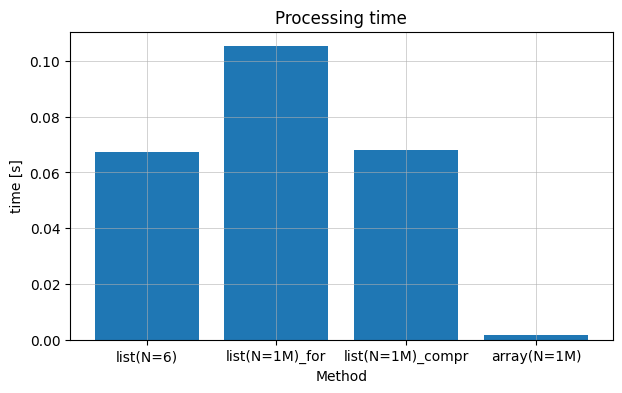

In [69]:
# plot the results 

plt.figure(figsize=(7, 4))
plt.bar(['list(N=6)', 'list(N=1M)_for', 'list(N=1M)_compr', 'array(N=1M)'], [elapsed_time_list, elapsed_time_list_for, elapsed_time_list_compr, elapsed_time_numpy])
plt.title('Processing time')
plt.ylabel('time [s]')
plt.xlabel('Method')
plt.grid(lw=.4)
plt.show()

Numpy demonstrated to be the faster in doing the *element-wise operation*

## different shapes

![shapes](https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png)

***Scalar***
:  is a single numerical value. It is a 0-dimensional quantity 
+ Scalars are represented by a single number
+ They do not have any direction, only magnitude)

***Vector***
:  is an ordered list of numbers. It is a 1-dimensional array of scalars 
+ Vectors have both magnitude and direction 
+ They are often used to represent physical quantities like velocity, force, and displacement.
+ In mathematics, a vector of length nn is called an *n*-dimensional vector.

***Matrix***
: is a 2-dimensional array of numbers, organized in *rows* and *columns* (i.e., grayscale images).
+ Matrices can represent linear transformations, systems of linear equations, and data tables.
+ A matrix with mm rows and nn columns is called an m×nm×n matrix.
+ Special types of matrices include square matrices, diagonal matrices, identity matrices, and zero matrices.

***Tensor***
: is a multi-dimensional array of numbers (i.e., RGB images). 
+ Tensors are used in various fields including physics (to describe stress, strain, and elasticity), computer graphics, and machine learning (where they are used to represent data and operations in neural networks).
+ The number of dimensions of a tensor is called its rank. For example, a rank-3 tensor has three dimensions.

<center>

| Concept | Dimension | Example                       |
|---------|-----------|-------------------------------|
| Scalar  | 0         | 55                            |
| Vector  | 1         | [1, 2, 3]                     |
| Matrix  | 2         | [[1, 2], [3, 4]]              |
| Tensor  | 3+        | [[[1, 2], [3, 4]], [[5, 6], [7, 8]]] |

</center>



> Example: consider you want to multiply a *1*-dimensional vector with a Scalar.

### using lists

In [77]:
scalar = 5
vector_size = 1_000_000  # Size of the arrays/lists
vector = list(range(vector_size))  # list

start = time.time()
output = [value * scalar for value in vector]
end = time.time()

elapsed_time_list = end - start


print(output[0:7])
print(f'{elapsed_time_list= : .4f}')

[0, 5, 10, 15, 20, 25, 30]
elapsed_time_list=  0.0452


### using numpy

In [78]:
scalar = 5
vector_size = 1_000_000  # Size of the arrays/lists
vector = np.array(list(range(vector_size)))  # convert a list into np.ndarray object

start = time.time()
output = vector * scalar
end = time.time()

elapsed_time_numpy = end - start

print(output[0:7])
print(f'{elapsed_time_numpy= : .4f}')

[ 0  5 10 15 20 25 30]
elapsed_time_numpy=  0.0080


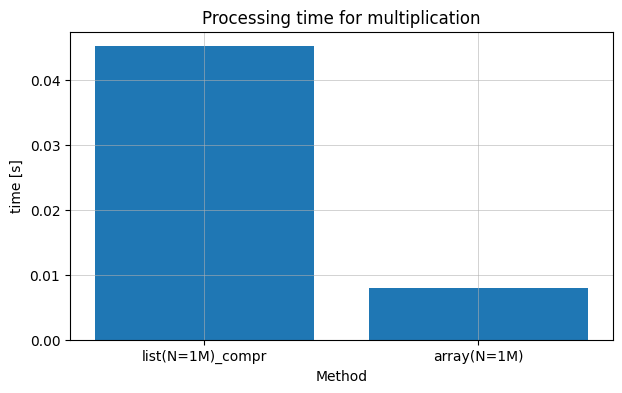

In [79]:
# plot the results 

plt.figure(figsize=(7, 4))
plt.bar(['list(N=1M)_compr', 'array(N=1M)'], [elapsed_time_list, elapsed_time_numpy])
plt.title('Processing time for multiplication')
plt.ylabel('time [s]')
plt.xlabel('Method')
plt.grid(lw=.4)
plt.show()

In [86]:
print(f'Numpy was {(1 - elapsed_time_numpy/elapsed_time_list)*100 : .2f}% faster')

Numpy was  82.27% faster


# `ndarray` object

### Scalar

In [104]:
# create a scalar
scalar_obj = np.array(5)

# create a scalar of specific data type
scalar_int = np.int32(5)  # int32 (max is 2^32)
scalar_float = np.float64(5)  # float64 (max is 2^64)

print(scalar_obj)
print(scalar_obj.dtype)
print(type(scalar_obj), "\n")

print(scalar_int)
print(scalar_int.dtype)
print(type(scalar_int), "\n")

print(scalar_float)
print(scalar_float.dtype)
print(type(scalar_float))


5
int64
<class 'numpy.ndarray'> 

5
int32
<class 'numpy.int32'> 

5.0
float64
<class 'numpy.float64'>


In [25]:
# explore scalar
scalar = np.array(5, dtype=np.uint8)

print(f'Type: {scalar.dtype}')
print(f'Dimensions: {scalar.ndim}')
print(f'Shape: {scalar.shape}')
print(f'Size: {scalar.size}')
print(f'Memory usage (B): {scalar.nbytes}')


Type: uint8
Dimensions: 0
Shape: ()
Size: 1
Memory usage (B): 1


In [131]:
scalar1 = np.array(15)
scalar2 = np.array(5)

# mathematical operations
print('*** Operations:')
print(f'Addition {scalar1 + scalar2}')
print(f'Substraction {scalar1 - scalar2}')
print(f'Multiplication {scalar1 * scalar2}')
print(f'Floating-Division {scalar1 / scalar2}')
print(f'Floor-division {scalar1 // scalar2}')
print(f'Exponentiation {scalar1 ** scalar2}')


*** Operations:
Addition 20
Substraction 10
Multiplication 75
Floating-Division 3.0
Floor-division 3
Exponentiation 759375


### Vector

In [106]:
# create a vector array
vector_obj = np.array([10, 5, 4, 3])

# create a vector array of specific data type
vector_int = np.array([10, 5, 4, 3], np.uint32) # int32 (max is 2^32)
vector_float = np.array([10, 5, 4, 3], np.float64)  # float64 (max is 2^64)

print(vector_obj)
print(vector_obj.dtype)
print(type(vector_obj), "\n")

print(vector_int)
print(vector_int.dtype)
print(type(vector_int), "\n")

print(vector_float)
print(vector_float.dtype)
print(type(vector_float))


[10  5  4  3]
int64
<class 'numpy.ndarray'> 

[10  5  4  3]
uint32
<class 'numpy.ndarray'> 

[10.  5.  4.  3.]
float64
<class 'numpy.ndarray'>


In [28]:
# explore vector array
vector = np.array([10, 5, 4, 3], dtype='int16')

print(f'Type: {vector.dtype}')
print(f'Dimensions: {vector.ndim}')
print(f'Shape: {vector.shape}')
print(f'Size: {vector.size}')
print(f'Memory usage (B): {vector.nbytes}')


Type: int16
Dimensions: 1
Shape: (4,)
Size: 4
Memory usage (B): 8


In [109]:
# create vector array with START number, STOP number, NUMBER of elements to take, DATA TYPE
arr = np.linspace(0, 100, 10, dtype=np.uint8)
print(arr)

[  0  11  22  33  44  55  66  77  88 100]


In [110]:
# create vector array with START number, STOP number, STEP to take between elements, DATA TYPE
arr = np.arange(0, 100, 10, dtype=np.uint8)
print(arr)

[ 0 10 20 30 40 50 60 70 80 90]


In [135]:
# create vector array of datatype INT with random numbers between START number, STOP number, SIZE
arr = np.random.randint(0, 8, 10)
print(arr)

[3 3 4 5 0 0 2 0 0 3]


In [139]:
# create a vector array of datatype FLOAT with random numbers
arr = np.random.rand(8)
print(arr)

[0.47457288 0.25219909 0.46684836 0.19304106 0.16915109 0.8458553
 0.25175041 0.8052821 ]


In [142]:
vector1 = np.arange(0, 10, 1, dtype=np.int16)
vector2 = np.linspace(10, 20, 10, dtype=np.int32)

print(f'{vector1= }\n')
print(f'{vector2= }\n')

# mathematical operations
print('*** Operations:')
print(f'Addition {vector1 + vector2}\n')
print(f'Substraction {vector1 - vector2}\n')
print(f'Multiplication {vector1 * vector2}\n')
print(f'Floating-Division {vector1 / vector2}\n')
print(f'Floor-division {vector1 // vector2}\n')
print(f'Exponentiation {vector1 ** vector2}\n')

vector1= array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

vector2= array([10, 11, 12, 13, 14, 15, 16, 17, 18, 20], dtype=int32)

*** Operations:
Addition [10 12 14 16 18 20 22 24 26 29]

Substraction [-10 -10 -10 -10 -10 -10 -10 -10 -10 -11]

Multiplication [  0  11  24  39  56  75  96 119 144 180]

Floating-Division [0.         0.09090909 0.16666667 0.23076923 0.28571429 0.33333333
 0.375      0.41176471 0.44444444 0.45      ]

Floor-division [0 0 0 0 0 0 0 0 0 0]

Exponentiation [          0           1        4096     1594323   268435456   452807053
  -683606016 -2094633337           0   689956897]



### Matrix

In [29]:
# create a 3x3 matrix array
matrix_obj = np.array([[10, 5, 4], [1, 2, 4], [5, 1, 3]], dtype='float32')


print(matrix_obj)
print(matrix_obj.dtype)
print(type(matrix_obj), "\n")

[[10.  5.  4.]
 [ 1.  2.  4.]
 [ 5.  1.  3.]]
float32
<class 'numpy.ndarray'> 



In [30]:
# explore the matrix
print(f'Type: {matrix_obj.dtype}')
print(f'Dimensions: {matrix_obj.ndim}')
print(f'Shape: {matrix_obj.shape}')
print(f'Size: {matrix_obj.size}')
print(f'Memory usage (B): {matrix_obj.nbytes}')


Type: float32
Dimensions: 2
Shape: (3, 3)
Size: 9
Memory usage (B): 36


In [31]:
# create a 3 rows by 4 columns matrix of dtype int16 initialized with zeros
matrix_zeros = np.full((3, 4), fill_value=0, dtype='int16')
print(matrix_zeros)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [32]:
# create a matrix with same shape as 'matrix_zeros' (3 by 4) of dtype float32
matrix_zeros = np.full_like(matrix_zeros, fill_value=1, dtype='float32')
print(matrix_zeros)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [33]:
# create a matrix with same shape as 'matrix_zeros' (3 by 4) of dtype int8 and filled with zeros
matrix_unos = np.ones_like(matrix_zeros, dtype='int8')
print(matrix_unos)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [34]:
# create a matrix with same shape as 'matrix_zeros' (3 by 4) of dtype int8 and filled with zeros
matrix_zeros = np.zeros_like(matrix_zeros, dtype='int8')
print(matrix_zeros)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


it is important to notice that changing the `dtype`, also the memory required to store the data changes:

In [42]:
# same shape, same value but different dtype
matrix_int8 = np.ones((1,1), dtype='int8')
matrix_int16 = np.ones((1,1), dtype='int16')
matrix_int32 = np.ones((1,1), dtype='int32')
matrix_float32 = np.ones((1,1), dtype='float32')
matrix_float64 = np.ones((1,1), dtype='float64')

print(f'Memory usage Int8 (B): {matrix_int8.nbytes}')
print(f'Memory usage Int16 (B): {matrix_int16.nbytes}')
print(f'Memory usage Int32 (B): {matrix_int32.nbytes}')
print(f'Memory usage float32 (B): {matrix_float32.nbytes}')
print(f'Memory usage float64 (B): {matrix_float64.nbytes}')

Memory usage Int8 (B): 1
Memory usage Int16 (B): 2
Memory usage Int32 (B): 4
Memory usage float32 (B): 4
Memory usage float64 (B): 8


In [48]:
# create a matrix  of datatype FLOAT with random numbers
mat = np.random.rand(4, 4)
print(mat)

[[0.41965157 0.51911041 0.22652178 0.73282051]
 [0.58273954 0.14399408 0.35689183 0.84646164]
 [0.90439315 0.97765658 0.31492305 0.66224108]
 [0.81341203 0.35995543 0.06426745 0.90731156]]


In [57]:
# 3x3 matrix
mat1 = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [5, 5, 6]
    ],
    dtype=np.int16)

# 3x3 matrix
mat2 = np.full((3, 3), fill_value=10)

print(f'{mat1= }\n')
print(f'{mat2= }\n')

# mathematical operations
print('*** Operations:')
print(f'Addition {mat1 + mat2}\n')
print(f'Substraction {mat1 - mat2}\n')
print(f'Multiplication {mat1 * mat2}\n')
print(f'Floating-Division {mat1 / mat2}\n')
print(f'Floor-division {mat1 // mat2}\n')
print(f'Exponentiation {mat1 ** mat2}\n')


mat1= array([[1, 2, 3],
       [3, 4, 5],
       [5, 5, 6]], dtype=int16)

mat2= array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]])

*** Operations:
Addition [[11 12 13]
 [13 14 15]
 [15 15 16]]

Substraction [[-9 -8 -7]
 [-7 -6 -5]
 [-5 -5 -4]]

Multiplication [[10 20 30]
 [30 40 50]
 [50 50 60]]

Floating-Division [[0.1 0.2 0.3]
 [0.3 0.4 0.5]
 [0.5 0.5 0.6]]

Floor-division [[0 0 0]
 [0 0 0]
 [0 0 0]]

Exponentiation [[       1     1024    59049]
 [   59049  1048576  9765625]
 [ 9765625  9765625 60466176]]



### Tensor

In [60]:
# create a 3 rows by 3 columns by 4 channels tensor array
tens_obj = np.ones((3,3,4), dtype='float32')


print(tens_obj)
print(tens_obj.dtype)
print(type(tens_obj), "\n")

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
float32
<class 'numpy.ndarray'> 



In [61]:
# explore the matrix
print(f'Type: {tens_obj.dtype}')
print(f'Dimensions: {tens_obj.ndim}')
print(f'Shape: {tens_obj.shape}')
print(f'Size: {tens_obj.size}')
print(f'Memory usage (B): {matrix_obj.nbytes}')


Type: float32
Dimensions: 3
Shape: (3, 3, 4)
Size: 36
Memory usage (B): 144


In [62]:
# create a 3 rows by 4 columns by 5 channels tensor of dtype int16 initialized with zeros
tens_zeros = np.full((3, 4, 5), fill_value=0, dtype='int16')
print(tens_zeros)

[[[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]]


In [64]:
# create a tensor with same shape as 'tens_zeros' (3, 4, 5) of dtype float32
tens_zeros = np.full_like(tens_zeros, fill_value=1, dtype='float32')
print(tens_zeros)

[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]


In [65]:
# create a tensor with same shape as 'tens_zeros' (3, 4, 5) of dtype int8 and filled with zeros
tens_unos = np.ones_like(tens_zeros, dtype='int8')
print(tens_unos)

[[[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]]


In [66]:
# create a tensor with same shape as 'tens_zeros' (3, 4, 5) of dtype int8 and filled with zeros
tens_zeros = np.zeros_like(tens_zeros, dtype='int8')
print(tens_zeros)

[[[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]]


it is important to notice that changing the `dtype`, also the memory required to store the data changes:

In [67]:
# same shape, same value but different dtype
tens_int8 = np.ones((1, 1, 1), dtype='int8')
tens_int16 = np.ones((1, 1, 1), dtype='int16')
tens_int32 = np.ones((1, 1, 1), dtype='int32')
tens_float32 = np.ones((1, 1, 1), dtype='float32')
tens_float64 = np.ones((1, 1, 1), dtype='float64')

print(f'Memory usage Int8 (B): {tens_int8.nbytes}')
print(f'Memory usage Int16 (B): {tens_int16.nbytes}')
print(f'Memory usage Int32 (B): {tens_int32.nbytes}')
print(f'Memory usage float32 (B): {tens_float32.nbytes}')
print(f'Memory usage float64 (B): {matrix_float64.nbytes}')

Memory usage Int8 (B): 1
Memory usage Int16 (B): 2
Memory usage Int32 (B): 4
Memory usage float32 (B): 4
Memory usage float64 (B): 8


In [72]:
# create a tensor  of datatype FLOAT with random numbers
tens = np.random.rand(4, 4, 3)
print(tens)

[[[0.7858329  0.75702196 0.21971808]
  [0.55751865 0.72304026 0.50909863]
  [0.73747862 0.0286102  0.74537959]
  [0.40803099 0.76386545 0.05452122]]

 [[0.0593286  0.82667853 0.31723178]
  [0.48749345 0.39453679 0.31217869]
  [0.67676411 0.27174679 0.82209596]
  [0.28013962 0.65594564 0.84556987]]

 [[0.03721867 0.74035546 0.15778054]
  [0.49299055 0.86277012 0.41344847]
  [0.47597808 0.09882955 0.3587035 ]
  [0.50339262 0.69822318 0.76688185]]

 [[0.64189647 0.75518266 0.51424422]
  [0.51051195 0.37311005 0.65380283]
  [0.32166671 0.7018091  0.04364284]
  [0.78522117 0.30308271 0.77535559]]]


In [130]:
# 3x3x3 tensor
tens1 = np.random.rand(3, 3, 3)

# 3x3x3 tensor
tens2 = np.full((3, 3, 3), fill_value=10)

print(f'{tens1= }\n')
print(f'{tens2= }\n')

# mathematical operations
print('*** Operations [SAME SHAPE]:')
print(f'Addition {tens1 + tens2}\n')
print(f'Substraction {tens1 - tens2}\n')
print(f'Multiplication {tens1 * tens2}\n')
print(f'Floating-Division {tens1 / tens2}\n')
print(f'Floor-division {tens1 // tens2}\n')
print(f'Exponentiation {tens1 ** tens2}\n')


tens1= array([[[0.36630863, 0.68631887, 0.01565036],
        [0.69703601, 0.65003359, 0.58298811],
        [0.84520359, 0.51764558, 0.78927148]],

       [[0.25705375, 0.05560606, 0.46822957],
        [0.62504831, 0.64438211, 0.00771054],
        [0.17811533, 0.52881037, 0.3183259 ]],

       [[0.76744529, 0.82833531, 0.17938175],
        [0.63908088, 0.16263693, 0.96894826],
        [0.09607401, 0.36870507, 0.32426375]]])

tens2= array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]])

*** Operations [SAME SHAPE]:
Addition [[[10.36630863 10.68631887 10.01565036]
  [10.69703601 10.65003359 10.58298811]
  [10.84520359 10.51764558 10.78927148]]

 [[10.25705375 10.05560606 10.46822957]
  [10.62504831 10.64438211 10.00771054]
  [10.17811533 10.52881037 10.3183259 ]]

 [[10.76744529 10.82833531 10.17938175]
  [10.63908088 10.16263693 10.96894826

In [134]:
# 3x3x3 tensor
tens1 = np.random.rand(3, 3, 3)

# 2x4x3 tensor
tens2 = np.full((3, 3, 3), fill_value=10)

# mathematical operations
print('*** Operations [DIFFERENT SHAPE]:')
print(f'Addition {np.add(tens1, tens2)}\n')
print(f'Substraction {np.subtract(tens1, tens2)}\n')
print(f'Multiplication {np.multiply(tens1, tens2)}\n')
print(f'Floating-Division {np.divide(tens1, tens2)}\n')
print(f'Floor-division {np.floor_divide(tens1, tens2)}\n')

*** Operations [DIFFERENT SHAPE]:
Addition [[[10.79265921 10.37261188 10.84342127]
  [10.34385819 10.30170798 10.92431941]
  [10.44695521 10.79412037 10.1879996 ]]

 [[10.62241825 10.65666218 10.9696987 ]
  [10.49985525 10.62889179 10.89185928]
  [10.99310107 10.82904468 10.1255038 ]]

 [[10.005127   10.7012184  10.1785276 ]
  [10.7382065  10.84800818 10.59651606]
  [10.64268561 10.83908903 10.83298714]]]

Substraction [[[-9.20734079 -9.62738812 -9.15657873]
  [-9.65614181 -9.69829202 -9.07568059]
  [-9.55304479 -9.20587963 -9.8120004 ]]

 [[-9.37758175 -9.34333782 -9.0303013 ]
  [-9.50014475 -9.37110821 -9.10814072]
  [-9.00689893 -9.17095532 -9.8744962 ]]

 [[-9.994873   -9.2987816  -9.8214724 ]
  [-9.2617935  -9.15199182 -9.40348394]
  [-9.35731439 -9.16091097 -9.16701286]]]

Multiplication [[[7.92659207 3.72611876 8.43421271]
  [3.43858195 3.01707977 9.24319407]
  [4.4695521  7.94120368 1.87999597]]

 [[6.2241825  6.56662183 9.69698704]
  [4.9985525  6.28891789 8.91859282]
  [9.931

# Accessing data

Numpy arrays are indexed such as *lists*, thus to access data indeces must be used.

In [95]:
# vector with values == index
vector = np.array([0,1,2,3,4,5,6,7])


# accessing values 
print(f'values at index 0 : {vector[0]}')
print(f'values at index -1 : {vector[-1]}')
print(f'values from index 1 to index 5: {vector[1:6]}')

values at index 0 : 0
values at index -1 : 7
values from index 1 to index 5: [1 2 3 4 5]


Accessing data is also useful to assign data

In [96]:
# vector with values == index
vector = np.array([0,1,2,3,4,5,6,7])

print(f'before data assignment {vector}')

# assigning values 
vector[2] = 4

print(f'after data assignment {vector}')


before data assignment [0 1 2 3 4 5 6 7]
after data assignment [0 1 4 3 4 5 6 7]


Determine **where two data sequences, with same shape, have similar values**

In [98]:
vector1 = np.array([0,1,2,3,4,5,6,7])
vector2 = vector1.copy()
vector2[5] = 4 # changed only a value

print(vector1 == vector2)


[ True  True  True  True  True False  True  True]


In [101]:
# give indices where vector1 == vector 2
np.argwhere(vector1 == vector2)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [6],
       [7]])

In [103]:
# give indices where vector1 != vector 2
np.argwhere(vector1 != vector2)

array([[5]])

# array statistics

In [113]:
# define the array
arr = np.random.rand(3, 3, 2)

# get statistics
print(f'max value:\n{(np.max(arr))}\n')
print(f'max for each row (axis 0):\n{(np.max(arr, axis=0))}\n')
print(f'max for each col (axis 1):\n{(np.max(arr, axis=1))}\n')
print(f'max for each channel (axis 2):\n{(np.max(arr, axis=2))}\n')


max value:
0.9756543722449613

max for each row (axis 0):
[[0.67353148 0.89164368]
 [0.73447081 0.97565437]
 [0.82195787 0.84887257]]

max for each col (axis 1):
[[0.63347825 0.89164368]
 [0.73447081 0.97565437]
 [0.82195787 0.70747575]]

max for each channel (axis 2):
[[0.89164368 0.25079231 0.22323158]
 [0.67353148 0.97565437 0.84887257]
 [0.5006708  0.15960951 0.82195787]]



In [165]:
# define the array
arr = np.random.rand(3, 3, 2)

# other statistics
print(f'sum value:\n{(np.sum(arr))}\n')
print(f'max value:\n{(np.max(arr))}\n')
print(f'min value:\n{(np.min(arr))}\n')
print(f'average value:\n{(np.mean(arr))}\n')
print(f'median value:\n{(np.median(arr))}\n')
print(f'Standard deviation value:\n{(np.std(arr))}\n')


sum value:
9.051757754237956

max value:
0.961936378547229

min value:
0.016429629591474204

average value:
0.5028754307909975

median value:
0.5683342694390877

Standard deviation value:
0.3105515819574633



### correlation coefficient (*r*)

It could be usefull to test correlation among variables to understand it they are either**positivelly**, **negativelly** correlated among each other or **not correlated**. The key statistics for this test is the [*Piearson correlation (r)*](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Correlation Coefficient Matrix:
[[1.         0.98531038]
 [0.98531038 1.        ]]

Correlation Coefficient between data1 and data2:
0.9853103832101714


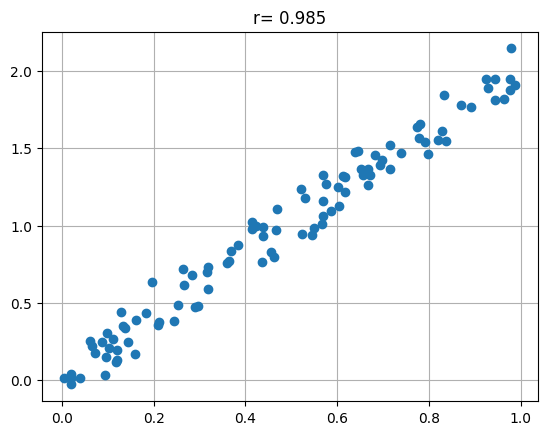

In [163]:
# Generate two sets of random data
np.random.seed(0)  # use seed for reproducibility
data1 = np.random.rand(100)
data2 = 2 * data1 + np.random.normal(0, 0.1, 100)  # Strongly correlated with some noise

# Compute the correlation coefficient matrix
corr_matrix = np.corrcoef(data1, data2)

# Print the correlation coefficient matrix
print("Correlation Coefficient Matrix:")
print(corr_matrix)

# Extract the correlation coefficient between data1 and data2
corr_coefficient = corr_matrix[0, 1]
print("\nCorrelation Coefficient between data1 and data2:")
print(corr_coefficient)


plt.plot(data1, data2, 'o')
plt.title(f'r={corr_coefficient: .3f}')
plt.grid()
plt.show()

# PyAgri Focus

A `scalar` can represent a single value, such as the **average temperature of a specific day**.

In [82]:
# Scalar: Average temperature of the day
average_temperature = np.float32(25.6)

print(f"Average Temperature: {average_temperature}")

Average Temperature: 25.600000381469727


A `vector` can represent a one-dimensional array of values, such as the **rainfall recorded over a week**.

In [83]:
# Vector: Rainfall over a week (in mm)
rainfall_week = np.array([10.2, 5.8, 12.1, 0.0, 7.3, 6.5, 8.0], dtype='float32')
print(f"Rainfall over a week: {rainfall_week}")

Rainfall over a week: [10.2  5.8 12.1  0.   7.3  6.5  8. ]


A `matrix` can represent a two-dimensional array of values, such as the **soil moisture levels at different depths for several locations**.

In [84]:
# Matrix: Soil moisture levels (in percentage) at different depths (columns) for 4 locations (rows)
soil_moisture = np.array([[12.5, 14.3, 15.8],
                          [11.2, 13.7, 14.9],
                          [13.1, 15.4, 16.3],
                          [12.8, 14.1, 15.0]], dtype='float32')

print("Soil Moisture Levels (locations x depths):")
print(soil_moisture)

Soil Moisture Levels (locations x depths):
[[12.5 14.3 15.8]
 [11.2 13.7 14.9]
 [13.1 15.4 16.3]
 [12.8 14.1 15. ]]


A `tensor` can represent a multi-dimensional array of values, such as **satellite images over time where each image has multiple spectral bands**.

In [85]:
# Tensor: Satellite images (time x height x width x spectral bands)

# Example tensor with 3 time steps, 2x2 image size, and 4 spectral bands
satellite_images = np.random.rand(3, 2, 2, 4)
print("Satellite Images (time x height x width x spectral bands):")
print(satellite_images)

Satellite Images (time x height x width x spectral bands):
[[[[0.40196651 0.34230783 0.95597852 0.3193096 ]
   [0.58816349 0.1989718  0.70914267 0.55657764]]

  [[0.76840169 0.92937252 0.42490114 0.55591149]
   [0.47937262 0.29259835 0.13562749 0.26061886]]]


 [[[0.49312814 0.75172792 0.28649811 0.91960722]
   [0.65321907 0.51332    0.28720406 0.38360143]]

  [[0.85162056 0.18614726 0.89772304 0.67809747]
   [0.05191331 0.1747572  0.07834507 0.98735923]]]


 [[[0.08639852 0.86261414 0.2683187  0.46997177]
   [0.77181907 0.73012338 0.77429207 0.54071858]]

  [[0.13959231 0.20219605 0.39388671 0.51152684]
   [0.90252734 0.40029031 0.39808507 0.84965885]]]]


To access the spectral data of **day 1**:

In [129]:
day_one = satellite_images[0]

print(f'First day spectral data:\n\n{day_one}')
print(f'\nmaximum reflectance of each day:\n{np.max(satellite_images, axis=3)}')  # maximum row and column values

First day spectral data:

[[[0.40196651 0.34230783 0.95597852 0.3193096 ]
  [0.58816349 0.1989718  0.70914267 0.55657764]]

 [[0.76840169 0.92937252 0.42490114 0.55591149]
  [0.47937262 0.29259835 0.13562749 0.26061886]]]

maximum reflectance of each day:
[[[0.95597852 0.70914267]
  [0.92937252 0.47937262]]

 [[0.91960722 0.65321907]
  [0.89772304 0.98735923]]

 [[0.86261414 0.77429207]
  [0.51152684 0.90252734]]]
